In [24]:
import pandas as pd
import numpy as np
import json
import os
import sklearn
import patsy
%matplotlib inline

In [3]:
#os.listdir('/home/ds/notebooks/Data')

In [52]:
df=pd.read_csv('/home/ds/notebooks/Data/retention.csv')

In [26]:
df.groupby('Retention').size()

Retention
0    2375
1    3248
dtype: int64

In [27]:
2375+3248

5623

In [28]:
df.head()

,Unnamed: 0,User ID,Week,Active_Days,Group,Install_Date_Category,Retention,Dig,Fly,Hop,Jump,Run,Sit,Skip,Visit
0,0,1,1,7,A,Day 1,1,2,11,3,51,285,19,49,86
1,1,2,1,4,A,Day 2,1,1,9,0,7,11,4,4,16
2,2,3,1,7,A,Day 1,1,0,12,5,19,147,8,25,101
3,3,4,1,7,A,Day 2,1,4,6,8,17,84,7,13,73
4,4,5,1,2,A,Day 3,0,1,0,1,1,2,0,0,3


In [29]:
pd.crosstab(df['Retention'], df['Active_Days'], rownames=['retention'],colnames=['Active_Days'])

Active_Days,1,2,3,4,5,6,7
retention,,,,,,,
0,1359,503,247,140,83,29,14
1,261,295,371,364,425,521,1011


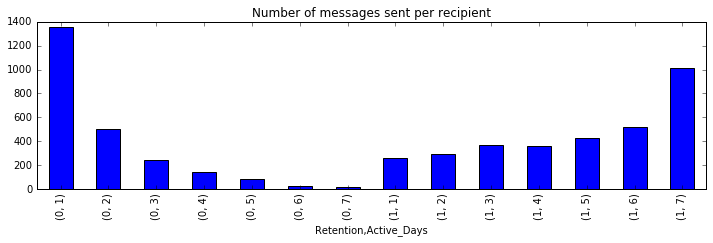

In [30]:
df.groupby(['Retention','Active_Days']).size().plot(
    kind='bar', figsize=(12,3), title='Number of messages sent per recipient')

In [31]:
retention_by_active=df.groupby(['Active_Days','Retention']).agg({'User ID':'nunique'})
retention_by_active.head()

User ID
Active_Days Retention         
1           0             1358
            1              261
2           0              502
            1              292
3           0              244

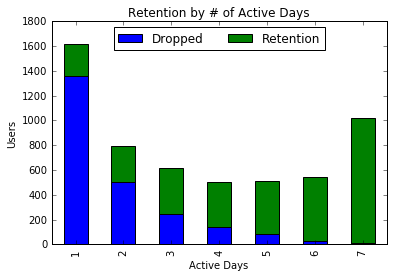

In [32]:
my_plot = retention_by_active.unstack().plot(kind='bar',stacked=True,title="Retention by # of Active Days")
my_plot.set_xlabel("Active Days")
my_plot.set_ylabel("Users")
my_plot.legend(["Dropped","Retention"], loc=9,ncol=4)

In [53]:
msk = np.random.rand(len(df)) < 0.8
df_train=df[msk]
df_test=df[~msk]
print "Training set has {0} observations and Test set has {1} observations.".format(len(df_train),len(df_test))

Training set has 4494 observations and Test set has 1129 observations.


In [13]:
#df=df.drop(['Unnamed: 0'], axis=1)

In [54]:
exclude_cols = ['Retention']
Y=df_train['Retention']
df_train=df_train.filter(regex="^(?!({0})$).*$".format('|'.join(exclude_cols)))

In [55]:
exclude_cols = ['Retention']
Y_test=df_test['Retention']
df_test=df_test.filter(regex="^(?!({0})$).*$".format('|'.join(exclude_cols)))
df_test['Install Date']=LabelEncoder().fit_transform(df_test['Install_Date_Category'])
df_test['Group_Encoded']=LabelEncoder().fit_transform(df_test['Group'])
df_test=df_test.drop(['Install_Date_Category'], axis=1)
df_test=df_test.drop(['Group'], axis=1)
df_test=df_test.drop(['Unnamed: 0'], axis=1)

In [56]:
print Y.shape
print df_train.shape

(4494,)
(4494, 14)


In [57]:
df.head()

,Unnamed: 0,User ID,Week,Active_Days,Group,Install_Date_Category,Retention,Dig,Fly,Hop,Jump,Run,Sit,Skip,Visit
0,0,1,1,7,A,Day 1,1,2,11,3,51,285,19,49,86
1,1,2,1,4,A,Day 2,1,1,9,0,7,11,4,4,16
2,2,3,1,7,A,Day 1,1,0,12,5,19,147,8,25,101
3,3,4,1,7,A,Day 2,1,4,6,8,17,84,7,13,73
4,4,5,1,2,A,Day 3,0,1,0,1,1,2,0,0,3


In [44]:
df_train.head()

,User ID,Week,Active_Days,Group,Install_Date_Category,Dig,Fly,Hop,Jump,Run,Sit,Skip,Visit
0,1,1,7,A,Day 1,2,11,3,51,285,19,49,86
2,3,1,7,A,Day 1,0,12,5,19,147,8,25,101
3,4,1,7,A,Day 2,4,6,8,17,84,7,13,73
4,5,1,2,A,Day 3,1,0,1,1,2,0,0,3
5,6,1,7,A,Day 2,2,6,0,11,60,10,6,79


In [58]:
from sklearn.preprocessing import LabelEncoder
df_train['Install Date']=LabelEncoder().fit_transform(df_train['Install_Date_Category'])
df_train['Group_Encoded']=LabelEncoder().fit_transform(df_train['Group'])

In [59]:
df_train=df_train.drop(['Unnamed: 0'], axis=1)

In [60]:
df_train=df_train.drop(['Install_Date_Category'], axis=1)
df_train=df_train.drop(['Group'], axis=1)
df_train.head()

,User ID,Week,Active_Days,Dig,Fly,Hop,Jump,Run,Sit,Skip,Visit,Install Date,Group_Encoded
0,1,1,7,2,11,3,51,285,19,49,86,0,0
1,2,1,4,1,9,0,7,11,4,4,16,1,0
2,3,1,7,0,12,5,19,147,8,25,101,0,0
3,4,1,7,4,6,8,17,84,7,13,73,1,0
4,5,1,2,1,0,1,1,2,0,0,3,2,0


In [61]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=3)
decision_tree=clf.fit(df_train, Y)

#rules(clf, data.feature_names, data.target_names)

In [62]:
decision_tree.predict(df_test)

array([1, 1, 1, ..., 0, 0, 0])

In [63]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [64]:
print 'accuracy', accuracy_score(Y_test, decision_tree.predict(df_test))

accuracy 0.810451727192


In [69]:
confusion=pd.DataFrame(confusion_matrix(Y_test, decision_tree.predict(df_test)))
confusion

,0,1
0,380,103
1,111,535


In [73]:
from sklearn import tree
from StringIO import StringIO
out = StringIO()
out = tree.export_graphviz(decision_tree, out_file = out)

In [78]:
from IPython.display import Image
import pydot 
dot_data = StringIO()  
tree.export_graphviz(decision_tree, out_file=dot_data,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

NameError: global name 'dot_parser' is not defined